In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("preprocessed_data.csv")

In [3]:

data.head()

,headline,category,short_description,text,processed_text,processed_sd
0,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",The Funniest Tweets From Parents This Week (Se...,funniest tweet parent week sept accidentally p...,accidentally put grownup toothpaste toddler to...
1,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Maury Wills, Base-Stealing Shortstop For Dodge...",maury will basestealing shortstop dodger dy ma...,maury will helped los angeles dodger win three...
2,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",la vega ace win first wnba title chelsea gray ...,la vega never professional sport champion sunday
3,Boston Marathon To Make Race More Inclusive Fo...,SPORTS,The race's organizers say nonbinary athletes w...,Boston Marathon To Make Race More Inclusive Fo...,boston marathon make race inclusive nonbinary ...,race organizer say nonbinary athlete wont regi...
4,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS,Varvaro pitched mostly with the Atlanta Braves...,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",anthony varvaro mlb pitcher turned transit cop...,varvaro pitched mostly atlanta brave started l...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74083 entries, 0 to 74082
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   headline           74083 non-null  object
 1   category           74083 non-null  object
 2   short_description  74083 non-null  object
 3   text               74083 non-null  object
 4   processed_text     74083 non-null  object
 5   processed_sd       74083 non-null  object
dtypes: object(6)
memory usage: 3.4+ MB


In [5]:
X = data['processed_text']
# X = data['processed_sd']
y = data['category']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
tfidf_vectorizer = TfidfVectorizer(max_features=8000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Decision Tree

In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_tfidf, y_train)
y_pred_dt = dt.predict(X_test_tfidf)

In [9]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.62
Decision Tree Results:
                precision    recall  f1-score   support

      BUSINESS       0.50      0.46      0.48      1538
         CRIME       0.56      0.50      0.53       849
 ENTERTAINMENT       0.54      0.56      0.55      2539
  FOOD & DRINK       0.66      0.64      0.65      1899
     PARENTING       0.66      0.69      0.68      2628
      POLITICS       0.68      0.68      0.68      2729
        SPORTS       0.59      0.55      0.57      1320
STYLE & BEAUTY       0.73      0.74      0.73      2900
        TRAVEL       0.64      0.63      0.64      2823
      WELLNESS       0.56      0.60      0.58      3000

      accuracy                           0.62     22225
     macro avg       0.61      0.60      0.61     22225
  weighted avg       0.62      0.62      0.62     22225



Decision Tree Confusion Matrix:
[[ 701   21   90   42   73  174   52   63  100  222]
 [  31  424   64   14   80   90   34   16   49   47]
 [  58   56 1421   63  159  198  134  139  132  179]
 [  51    5  109 1220   72   29   29   86  156  142]
 [  62   33  128   57 1821   61   35   94   90  247]
 [ 158   95  189   24   70 1860   73   31   82  147]
 [  47   39  163   25   51   53  722   50   78   92]
 [  58   16  144   77  112   39   35 2132  143  144]
 [  82   35  142  148  108  121   43  196 1788  160]
 [ 152   28  184  168  215  113   63  107  182 1788]]


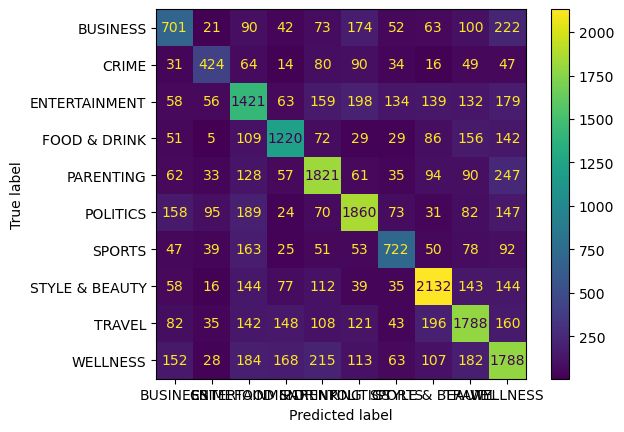

In [12]:
# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(cm_dt)
ConfusionMatrixDisplay(cm_dt, display_labels=dt.classes_).plot()

### Naive Bayes Classifier

In [14]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

In [15]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.78
Naive Bayes Results:
                precision    recall  f1-score   support

      BUSINESS       0.80      0.51      0.62      1538
         CRIME       0.83      0.61      0.71       849
 ENTERTAINMENT       0.78      0.74      0.76      2539
  FOOD & DRINK       0.85      0.79      0.82      1899
     PARENTING       0.70      0.77      0.74      2628
      POLITICS       0.75      0.85      0.80      2729
        SPORTS       0.91      0.67      0.77      1320
STYLE & BEAUTY       0.86      0.85      0.85      2900
        TRAVEL       0.78      0.85      0.82      2823
      WELLNESS       0.71      0.82      0.76      3000

      accuracy                           0.78     22225
     macro avg       0.80      0.75      0.76     22225
  weighted avg       0.78      0.78      0.78     22225



Naive Bayes Confusion Matrix:
[[ 785   10   30   24  111  231   10   24   77  236]
 [   6  521   33    8   68  144    4    9   37   19]
 [   7   26 1886   24  120  157   22  172   67   58]
 [  11    1   21 1502   66   10    4   32  151  101]
 [   8    9   83   40 2029   41   12   60   67  279]
 [  69   41   73    3   54 2329   10   18   59   73]
 [  14   15  115    7   67   82  889   25   51   55]
 [  20    0   80   16  103   24    3 2474   74  106]
 [  28    6   49   63   83   31   10   47 2413   93]
 [  30    0   48   90  190   45   16   27   87 2467]]


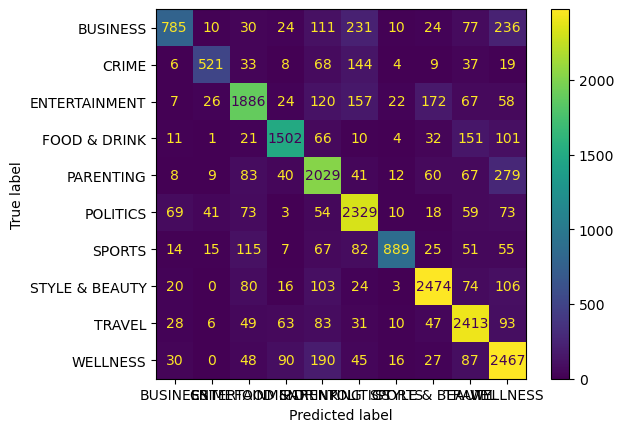

In [16]:
# Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:")
print(cm_nb)
ConfusionMatrixDisplay(cm_nb, display_labels=nb.classes_).plot()


### Ensemble Methods 
### 1. Random Forest Classifier

In [17]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

In [18]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.73
Random Forest Results:
                precision    recall  f1-score   support

      BUSINESS       0.72      0.52      0.60      1538
         CRIME       0.68      0.61      0.64       849
 ENTERTAINMENT       0.67      0.64      0.65      2539
  FOOD & DRINK       0.76      0.77      0.77      1899
     PARENTING       0.73      0.80      0.76      2628
      POLITICS       0.76      0.79      0.77      2729
        SPORTS       0.74      0.62      0.67      1320
STYLE & BEAUTY       0.82      0.81      0.82      2900
        TRAVEL       0.77      0.75      0.76      2823
      WELLNESS       0.64      0.76      0.70      3000

      accuracy                           0.73     22225
     macro avg       0.73      0.71      0.71     22225
  weighted avg       0.73      0.73      0.73     22225



Random Forest Confusion Matrix:
[[ 793   13   65   42   51  156   42   35   85  256]
 [  17  515   44   13   80   74   10   11   42   43]
 [  18   45 1631   44  176  192   82  114   80  157]
 [  29    4   72 1470   44   18   18   66   79   99]
 [  12   15   63   31 2106   37   20   64   59  221]
 [  84   94   93   17   68 2146   33   11   62  121]
 [  26   33  151   24   51   59  813   42   50   71]
 [  26    7  116   49   80   27   20 2359   75  141]
 [  29   17  108  132   62   60   23  129 2107  156]
 [  70   16  102  120  162   57   40   51  108 2274]]


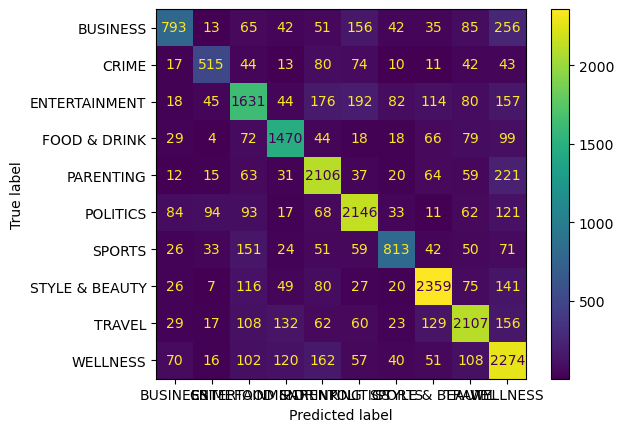

In [19]:
# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=rf.classes_).plot()

### 2. Gradient Boosting Classifier

In [20]:
# Encode the target labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [21]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_tfidf, y_train_encoded)
y_pred_xgb = xgb.predict(X_test_tfidf)

# Convert the predicted labels back to the original categorical labels
y_pred_xgb_original = label_encoder.inverse_transform(y_pred_xgb)


In [22]:
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_xgb):.2f}")
print("XGBoost Results:")
print(classification_report(y_test_encoded, y_pred_xgb))

Accuracy: 0.76
XGBoost Results:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      1538
           1       0.72      0.65      0.69       849
           2       0.66      0.71      0.68      2539
           3       0.82      0.77      0.79      1899
           4       0.77      0.81      0.79      2628
           5       0.81      0.79      0.80      2729
           6       0.82      0.71      0.76      1320
           7       0.84      0.84      0.84      2900
           8       0.81      0.78      0.79      2823
           9       0.68      0.78      0.73      3000

    accuracy                           0.76     22225
   macro avg       0.77      0.75      0.75     22225
weighted avg       0.77      0.76      0.76     22225



XGBoost Confusion Matrix:
[[ 938   15   76   26   51  119   26   28   61  198]
 [  17  556   45    5   68   71    8    8   35   36]
 [  19   46 1797   24  136  172   53   96   63  133]
 [  23    4   95 1462   41   12   17   71   72  102]
 [  19   12   79   29 2134   25   17   57   49  207]
 [ 106   89  114   10   51 2157   29    9   52  112]
 [  18   27  132    7   41   44  935   25   41   50]
 [  23    3  133   26   65   16    7 2442   63  122]
 [  30   12  129  104   49   27   20  116 2205  131]
 [  62   10  125  100  140   36   31   57   96 2343]]


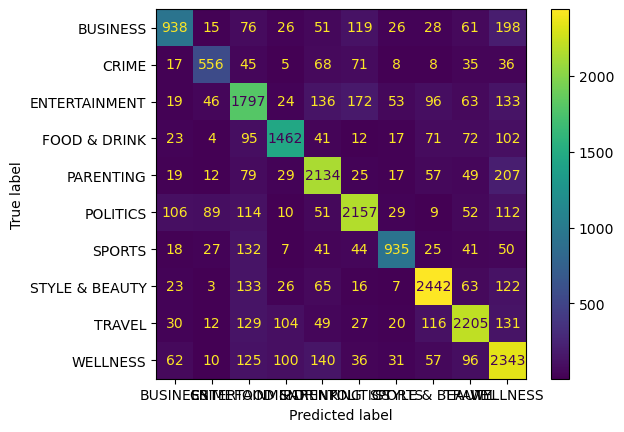

In [ ]:
# XGBoost
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
print("XGBoost Confusion Matrix:")
print(cm_xgb)
ConfusionMatrixDisplay(cm_xgb, display_labels=label_encoder.classes_).plot()


In [ ]:
# Naive Bayes Hyperparameters
nb_params = {'alpha': [0.5, 1.0, 1.5]}
nb = MultinomialNB()
grid_nb = GridSearchCV(nb, param_grid=nb_params, cv=3, verbose=2, n_jobs=-1, scoring='accuracy')
grid_nb.fit(X_train_tfidf, y_train)
print(f"Best Naive Bayes Params: {grid_nb.best_params_}")


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Naive Bayes Params: {'alpha': 0.5}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

random_search.fit(X_train_tfidf, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

In [17]:

# Best parameters and model
print(f"Best Parameters: {random_search.best_params_}")
best_rf_random = random_search.best_estimator_


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
